<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/Maestria-IMCA/blob/main/Regresi%C3%B3n_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Regresión logística**

**Ejemplo. Regresión logística binaria simple**. En esta ocasión queremos predecir cuál es la probabilidad de que un alumno apruebe un examen en función de las horas de estudio.

Como la variable objetivo es una variable cualitativa binaria (solo toma dos valores: aprobado=1, desaprobado=0) y solo tenemos una variable explicativa (las horas de estudio) podemos usar una regresión logística binaria simple para modelar la relación entre ambas variables.

In [2]:
#carga de la libreria y la data en excel
import pandas as pd
df=pd.read_excel('reg_log.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20 non-null     int64  
 1   Horas       20 non-null     float64
 2   Aprobado    20 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 608.0 bytes


In [4]:
df.head()

,Unnamed: 0,Horas,Aprobado
0,0,0.50,0
1,1,0.75,0
2,2,1.00,0
3,3,1.25,0
4,4,1.50,0


In [5]:
#carga de la variables
X=df[['Horas']]
y=df['Aprobado']

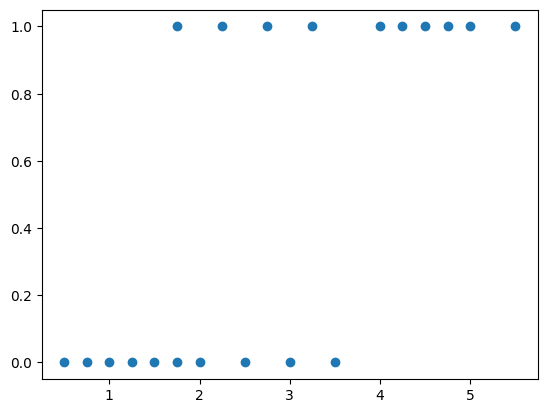

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
modelo=LogisticRegression()
modelo.fit(X, y)

LogisticRegression()

In [8]:
modelo.predict([[2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [9]:
modelo.predict([[1.5], [4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1])

In [10]:
modelo.predict_proba([[2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.69895285, 0.30104715]])

In [24]:
predicciones=modelo.predict(X)

In [ ]:
probabilidades=modelo.predict_proba(X)
#probabilidades

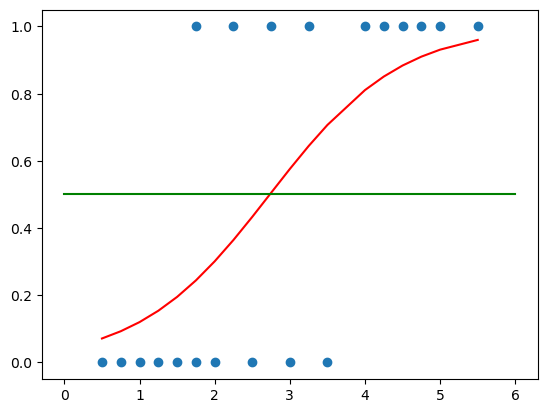

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, probabilidades[:,1], color='r')
plt.plot([0, 6], [.5, .5], color='g')
#plt.scatter(X, predicciones)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y, predicciones)

0.8

**Ejemplo.** El departamento de crédito al consumo de un banco desea automatizar el proceso de toma de decisiones para la aprobación de líneas de crédito con garantía hipotecaria. Para hacer esto, seguirán las recomendaciones de la Ley de Igualdad de Oportunidades de Crédito para crear un modelo de calificación crediticia empíricamente derivado y estadísticamente sólido. El modelo se basará en datos recopilados de solicitantes recientes a los que se les otorgó crédito a través del proceso actual de suscripción de préstamos. Las posibles variables explicativas son:
* la cantidad del préstamo,
* el valor de la propiedad,
* el tipo de trabajo,
* la cantidad de años que lleva en el trabajo actual,
* el número de reportes negativos de crédito (major derogatory) entre otras.

In [ ]:
import pandas as pd
df=pd.read_csv('credit.csv')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


**BAD =** Cliente moroso o pagador (1 o 0).

**LOAN =** cantidad del prestamo solicitado.

**MORTDUE =** monto adeudado de la hipoteca existente.

**DEROG =** cantidad de reportes de crédito negativos.

**YOJ =** años en el trabajo actual.

**CLAGE =** Antiguedad del tradeline más antiguo en meses

**CLNO =** Número de líneas de crédito.

**DELINQ =** número de líneas de crédito morosas.

**VALUE =** valor de la propiedad actual.

In [ ]:
df.shape

(5960, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
df.drop(['DEBTINC'], axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4247 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      4247 non-null   int64  
 1   LOAN     4247 non-null   int64  
 2   MORTDUE  4247 non-null   float64
 3   VALUE    4247 non-null   float64
 4   REASON   4247 non-null   object 
 5   JOB      4247 non-null   object 
 6   YOJ      4247 non-null   float64
 7   DEROG    4247 non-null   float64
 8   DELINQ   4247 non-null   float64
 9   CLAGE    4247 non-null   float64
 10  NINQ     4247 non-null   float64
 11  CLNO     4247 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 431.3+ KB


In [ ]:
X=df.drop(columns=['BAD', 'JOB', 'REASON'])
y=df['BAD']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2023)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelo=LogisticRegression()
modelo.fit(X_train,y_train)

LogisticRegression()

In [ ]:
print(modelo.intercept_)
print(modelo.coef_)

[-1.45660364e-05]
[[-2.99754879e-05 -2.84729087e-06  2.64167561e-06 -2.71390215e-04
   6.57456057e-05  9.99340524e-05 -5.81399766e-03  8.46959394e-05
  -1.33520615e-04]]


$y=\sigma(c_0+c_1x_1+c_2x_2+c_3x_3+c_4x_4+c_5x_5+c_6x_6+c_7x_7+c_8x_8+c_9x_9)$

Donde: $\sigma(z)=\frac{1}{1+e^{-z}}$

In [ ]:
modelo.predict([[1200, 40000, 50000, 4, 0, 1, 110, 0, 10]])

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [ ]:
predicciones_train=modelo.predict(X_train)
predicciones_test=modelo.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, predicciones_train), accuracy_score(y_test, predicciones_test)

(0.8060052987930527, 0.7870588235294118)